In [32]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as keras_backend
import random
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from tensorflow.keras import utils

import time

# Reproduction
#np.random.seed(333)
#print('Python version: ', sys.version)
#print('TensorFlow version: ', tf.__version__)
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('GPU found at: {}'.format(device_name))

In [15]:
multi_standard_list = ['ISO', 'SAE', 'JIS', 'JASO', 'GB', 'EN', 'KS']  # random sampling을 위한 "다중" 국가표준 리스트
single_standard_list = 'ISO' # random sampling을 위한 "단일" 국가표준 리스트    
number_of_sample = 2
#class_names = pd.read_csv("class_names.csv")

#df1 = pd.read_csv("data_27.csv") 
#meta_train_dataset = df1.copy()
#meta_train_target = meta_train_dataset.pop("Name")
#print("MetaTrain raw DATA shape: ", meta_train_dataset.shape)
#OHE_meta_train_target = pd.get_dummies(meta_train_target)
#print("OneHotEncorded DATA shape: ", OHE_meta_train_target.shape)
#OHE_meta_train_class_names = OHE_meta_train_target.columns
####################################################################################
#meta_train_dataset = pd.concat([meta_train_dataset, OHE_meta_train_target], axis=1)   
##print(meta_train_dataset.shape)
####################################################################################

meta_test_dataset = pd.read_csv("random100_data.csv")
meta_test_target = meta_test_dataset.pop("Name")
print("MetaTest raw DATA shape: ",meta_test_dataset.shape)
OHE_meta_test_target = pd.get_dummies(meta_test_target)
print("OneHotEncorded DATA shape: ", OHE_meta_test_target.shape)
OHE_meta_test_class_names = OHE_meta_test_target.columns
###################################################################
meta_test_dataset = pd.concat([meta_test_dataset, OHE_meta_test_target], axis=1)       
#print(meta_test_dataset.shape)
###################################################################
#
orig_train_dataset = pd.read_csv("DB.csv", header=None)
orig_train_label = pd.read_csv('Label_name.csv', header=None)
orig_train_dataset = pd.concat([orig_train_dataset,orig_train_label], axis=1)
orig_train_dataset.columns = pd.read_csv("data_27.csv").columns
train_target = orig_train_dataset.pop("Name")
print("Original raw DATA shape: ",orig_train_dataset.shape)
OHE_train_target = pd.get_dummies(train_target)
print("OneHotEncorded DATA shape: ", OHE_train_target.shape)
OHE_class_names = OHE_train_target.columns
###################################################################
train_dataset = pd.concat([orig_train_dataset, OHE_train_target], axis=1)   
#print(train_dataset.shape)
###################################################################

class StandardAlloyBatchGenerator():
    
    def __init__(self, tool="ISO"):
        self.tool = tool
        
    def data_sampling(self, dataset):
        #if not dataset == train_ds:
        #    dataset = meta_test_dataset.sample(frac=0.001).reset_index(drop=True)
        #else:
        #    dataset = train_dataset.sample(frac=0.0001).reset_index(drop=True)
        dataset1 = train_dataset.sample(frac=0.0001).reset_index(drop=True)
        
        dataset2 = meta_test_dataset.sample(frac=0.001).reset_index(drop=True)
        
        return dataset1, dataset2
    


    def single_random_sampling(self, num): # tool: standard_name, num: # of sampling data per material, kk: index of sampling dataset   
        f_index= "Name"
        file_name = 'test_file' 

        xlsxfile= pd.read_excel(f'{file_name}.xlsx',sheet_name=f'{self.tool}',engine='openpyxl')
        name_val=xlsxfile[f'{f_index}']
        name_val=name_val.values
        name_list=name_val.tolist()
        name_list = [x for x in name_list if pd.isnull(x) == False]
        total_list = pd.DataFrame()
        time =0 

        for m_name in name_list:
            name=m_name 

            frame = xlsxfile.loc[xlsxfile[f'{f_index}']==f'{name}']
            frame= pd.DataFrame(frame)
            frame=frame.drop(['Steel Class',f'{f_index}','표준번호','개정년도'],axis=1)
            k= pd.concat([frame],axis=0)
            k.to_csv("one_m.csv",index=False,encoding='utf-8-sig')  

            for count in range(0,num):
                time+=1
                data= pd.read_csv("./one_m.csv" ,encoding='utf-8-sig')
                data.fillna(0)
                f1_min, f1_max = data.iloc[0,0], data.iloc[0,1]
                f2_min, f2_max = data.iloc[0,2], data.iloc[0,3] 
                f3_min, f3_max = data.iloc[0,4], data.iloc[0,5] 
                f4_min, f4_max = data.iloc[0,6], data.iloc[0,7]
                f5_min, f5_max = data.iloc[0,8], data.iloc[0,9]
                f6_min, f6_max = data.iloc[0,10], data.iloc[0,11]
                f7_min, f7_max = data.iloc[0,12], data.iloc[0,13]
                f8_min, f8_max = data.iloc[0,14], data.iloc[0,15]
                f9_min, f9_max = data.iloc[0,16], data.iloc[0,17]
                f10_min, f10_max = data.iloc[0,18], data.iloc[0,19]
                f11_min, f11_max = data.iloc[0,20], data.iloc[0,21]    
                f12_min, f12_max = data.iloc[0,22], data.iloc[0,23]
                f13_min, f13_max = data.iloc[0,24], data.iloc[0,25]
                f14_min, f14_max = data.iloc[0,26], data.iloc[0,27]
                f15_min, f15_max = data.iloc[0,28], data.iloc[0,29]
                f16_min, f16_max = data.iloc[0,30], data.iloc[0,31]
                f17_min, f17_max = data.iloc[0,32], data.iloc[0,33]
                f18_min, f18_max = data.iloc[0,34], data.iloc[0,35]     

                if f1_max > 0:
                    a=random.randrange(f1_min*1000,f1_max*1000)
                    a /= 1000                   

                if f2_max > 0:
                    b=random.randrange(f2_min*1000,f2_max*1000)
                    b /= 1000
                else:
                    b=0 
                if f3_max > 0:
                    c=random.randrange(f3_min*1000,f3_max*1000)
                    c /= 1000
                else:
                    c=0 
                if f4_max > 0:
                    d=random.randrange(f4_min*1000,f4_max*1000)
                    d /= 1000
                else:
                    d=0 
                if f5_max > 0:
                    e=random.randrange(f5_min*1000,f5_max*1000)
                    e /= 1000
                else:
                    e=0 
                if f6_max > 0:
                    f=random.randrange(f6_min*1000,f6_max*1000)
                    f /= 1000
                else:
                    f=0 
                if f7_max > 0:
                    g=random.randrange(f7_min*1000,f7_max*1000)
                    g /= 1000
                else:
                    g=0 
                if f8_max > 0:
                    h=random.randrange(f8_min*1000,f8_max*1000)
                    h /= 1000
                else:
                    h=0 
                if f9_max > 0:
                    i=random.randrange(f9_min*1000,f9_max*1000)
                    i /= 1000
                else:
                    i=0 
             ####### 보론은 10000 연산
                if f10_max > 0:
                    j=random.randrange(f10_min*10000,f10_max*10000)
                    j /= 10000
                else:
                    j=0     

                if f11_max > 0:
                    k=random.randrange(f11_min*1000,f11_max*1000)
                    k /= 1000
                else:
                    k=0 
                if f12_max > 0:
                    l=random.randrange(f12_min*1000,f12_max*1000)
                    l /= 1000
                else:
                    l=0 
                if f13_max > 0:
                    m=random.randrange(f13_min*1000,f13_max*1000)
                    m /= 1000
                else:
                    m=0 
                if f14_max > 0:
                    n=random.randrange(f14_min*1000,f14_max*1000)
                    n /= 1000
                else:
                    n=0 
                if f15_max > 0:
                    o=random.randrange(f15_min*1000,f15_max*1000)
                    o /= 1000
                else:
                    o=0 
                if f16_max > 0:
                    p=random.randrange(f16_min*1000,f16_max*1000)
                    p /= 1000
                else:
                    p=0 
                if f17_max > 0:
                    q=random.randrange(f17_min*1000,f17_max*1000)
                    q /= 1000
                else:
                    q=0 
                if f18_max > 0:
                    r=random.randrange(f18_min*1000,f18_max*1000)
                    r /= 1000
                else:
                    r=0     

                k=pd.DataFrame([{"C":a,'Si':b, 'Mn':c ,'P':d,"S":e,"Cr":f,"Mo":g,"Ni":h,"V":i,"B":j,"Sn":k,"Cu":l,"Al":m,"Ti":n,"Nb":o,"W":p,"Pb":q,"N":r,"Name":name}])
                total_list = pd.concat([total_list, k])
                
        #print("# of single_standard_dataset: ", len(total_list))   
        
        target = total_list.pop("Name")
        OHE_target = pd.get_dummies(target)
        class_names = OHE_target.columns
        temp_class_names = pd.DataFrame(class_names)
        try: 
            if not os.path.exists('./meta_learning'):
                os.makedirs('./meta_learning')
                temp_class_names.to_csv('./meta_learning/class_names.csv', index=None, header=None)
            else: 
                temp_class_names.to_csv('./meta_learning/class_names.csv', index=None, header=None)
        except OSError:
            print('Error: Creating directory. ' + './meta_learning')
        total_list = pd.concat([total_list, OHE_target], axis=1)   
        total_list.to_csv("test_DB.csv", index=None)     
        return total_list
    
    def multi_random_sampling(self, tool, num): # tool: standard_name, num: # of sampling data per material, kk: index of sampling dataset
        data_frame = []
        for standard in tool:

            f_index= "Name"
            file_name = 'test_file' 

            xlsxfile= pd.read_excel(f'{file_name}.xlsx',sheet_name=f'{standard}',engine='openpyxl')
            name_val=xlsxfile[f'{f_index}']
            name_val=name_val.values
            name_list=name_val.tolist()
            name_list = [x for x in name_list if pd.isnull(x) == False]
            total_list = pd.DataFrame()
            time =0 

            for m_name in name_list:
                name=m_name 

                frame = xlsxfile.loc[xlsxfile[f'{f_index}']==f'{name}']
                frame= pd.DataFrame(frame)
                frame=frame.drop(['Steel Class',f'{f_index}','표준번호','개정년도'],axis=1)
                k= pd.concat([frame],axis=0)
                k.to_csv("one_m.csv",index=False,encoding='utf-8-sig')  



                for count in range(0,num):
                    time+=1
                    data= pd.read_csv("./one_m.csv" ,encoding='utf-8-sig')
                    data.fillna(0)
                    f1_min, f1_max = data.iloc[0,0], data.iloc[0,1]
                    f2_min, f2_max = data.iloc[0,2], data.iloc[0,3] 
                    f3_min, f3_max = data.iloc[0,4], data.iloc[0,5] 
                    f4_min, f4_max = data.iloc[0,6], data.iloc[0,7]
                    f5_min, f5_max = data.iloc[0,8], data.iloc[0,9]
                    f6_min, f6_max = data.iloc[0,10], data.iloc[0,11]
                    f7_min, f7_max = data.iloc[0,12], data.iloc[0,13]
                    f8_min, f8_max = data.iloc[0,14], data.iloc[0,15]
                    f9_min, f9_max = data.iloc[0,16], data.iloc[0,17]
                    f10_min, f10_max = data.iloc[0,18], data.iloc[0,19]
                    f11_min, f11_max = data.iloc[0,20], data.iloc[0,21]    
                    f12_min, f12_max = data.iloc[0,22], data.iloc[0,23]
                    f13_min, f13_max = data.iloc[0,24], data.iloc[0,25]
                    f14_min, f14_max = data.iloc[0,26], data.iloc[0,27]
                    f15_min, f15_max = data.iloc[0,28], data.iloc[0,29]
                    f16_min, f16_max = data.iloc[0,30], data.iloc[0,31]
                    f17_min, f17_max = data.iloc[0,32], data.iloc[0,33]
                    f18_min, f18_max = data.iloc[0,34], data.iloc[0,35]     

                    if f1_max > 0:
                        a=random.randrange(f1_min*1000,f1_max*1000)
                        a /= 1000                   

                    if f2_max > 0:
                        b=random.randrange(f2_min*1000,f2_max*1000)
                        b /= 1000
                    else:
                        b=0 
                    if f3_max > 0:
                        c=random.randrange(f3_min*1000,f3_max*1000)
                        c /= 1000
                    else:
                        c=0 
                    if f4_max > 0:
                        d=random.randrange(f4_min*1000,f4_max*1000)
                        d /= 1000
                    else:
                        d=0 
                    if f5_max > 0:
                        e=random.randrange(f5_min*1000,f5_max*1000)
                        e /= 1000
                    else:
                        e=0 
                    if f6_max > 0:
                        f=random.randrange(f6_min*1000,f6_max*1000)
                        f /= 1000
                    else:
                        f=0 
                    if f7_max > 0:
                        g=random.randrange(f7_min*1000,f7_max*1000)
                        g /= 1000
                    else:
                        g=0 
                    if f8_max > 0:
                        h=random.randrange(f8_min*1000,f8_max*1000)
                        h /= 1000
                    else:
                        h=0 
                    if f9_max > 0:
                        i=random.randrange(f9_min*1000,f9_max*1000)
                        i /= 1000
                    else:
                        i=0 
                 ####### 보론은 10000 연산
                    if f10_max > 0:
                        j=random.randrange(f10_min*10000,f10_max*10000)
                        j /= 10000
                    else:
                        j=0     

                    if f11_max > 0:
                        k=random.randrange(f11_min*1000,f11_max*1000)
                        k /= 1000
                    else:
                        k=0 
                    if f12_max > 0:
                        l=random.randrange(f12_min*1000,f12_max*1000)
                        l /= 1000
                    else:
                        l=0 
                    if f13_max > 0:
                        m=random.randrange(f13_min*1000,f13_max*1000)
                        m /= 1000
                    else:
                        m=0 
                    if f14_max > 0:
                        n=random.randrange(f14_min*1000,f14_max*1000)
                        n /= 1000
                    else:
                        n=0 
                    if f15_max > 0:
                        o=random.randrange(f15_min*1000,f15_max*1000)
                        o /= 1000
                    else:
                        o=0 
                    if f16_max > 0:
                        p=random.randrange(f16_min*1000,f16_max*1000)
                        p /= 1000
                    else:
                        p=0 
                    if f17_max > 0:
                        q=random.randrange(f17_min*1000,f17_max*1000)
                        q /= 1000
                    else:
                        q=0 
                    if f18_max > 0:
                        r=random.randrange(f18_min*1000,f18_max*1000)
                        r /= 1000
                    else:
                        r=0     

                    k=pd.DataFrame([{"C":a,'Si':b, 'Mn':c ,'P':d,"S":e,"Cr":f,"Mo":g,"Ni":h,"V":i,"B":j,"Sn":k,"Cu":l,"Al":m,"Ti":n,"Nb":o,"W":p,"Pb":q,"N":r,"Name":name}])
                    #total_list = total_list.append(k)
                    
                    total_list = pd.concat([total_list, k])
                    #print(f'[{len(name_list)*num}\{time}] {standard}규격의 {name} 강종을 {count+1}개 선정')
                    data_frame.append(total_list)
        total_list = pd.concat(data_frame)   
        print("# of multi_standard_dataset: ", len(total_list))         
        return total_list

def DataFrame_convert_tensor(alloy_generator, num):
    df = alloy_generator.single_random_sampling(num)
    target = df.iloc[:,18:]
    df = df.iloc[:,:18]
    dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))
    return dataset.shuffle(len(df)).batch(1)

#StandardAlloyBatchGenerator().single_random_sampling()

#cho = DataFrame_convert_tensor(StandardAlloyBatchGenerator(), 1)
#for a, b in cho.take(1):   # tensor 데이터셋 구조 확인을 위함 (데이타 하나만 출력하는 경우,)
#    print('Features: {}, Target: {}'.format(a, b))

def generate_dataset(train_size=10, test_size=10):
    def _generate_dataset(size):
        return [StandardAlloyBatchGenerator() for _ in range(size)]
    return _generate_dataset(train_size), _generate_dataset(test_size) 

#train_ds, test_ds = generate_dataset(single_standard_list, number_of_sample)
train_ds, test_ds = generate_dataset(1000,1000) ############# Data sampling generator

#x, y = generate_dataset(10,1)
#for i in x:
#    cho = i.single_random_sampling(1)
#print(cho)


MetaTest raw DATA shape:  (111980, 18)
OneHotEncorded DATA shape:  (111980, 1103)
Original raw DATA shape:  (7490421, 18)
OneHotEncorded DATA shape:  (7490421, 1103)


In [16]:
## 학습 조건 설정
learning_condition = ["neurons", "hidden_layers", "input_data_dim", "epochs_cond", "learning_rate_cond"]
condition = [[1000, 4, 18, 30, 0.0001]]
run_condition = pd.DataFrame(condition)
run_condition.columns = learning_condition

class ClassificationModel(keras.Model):

    def __init__(self):
        super().__init__()
        #self.hiddens = []
        #self.hidden1 = keras.layers.Dense(run_condition.iloc[0,0], input_shape=(run_condition.iloc[0,2],))
        #for i in range(run_condition.iloc[0,1]-1):
        #    self.hiddens.append(keras.layers.Dense(run_condition.iloc[0,0]))
        #self.out = keras.layers.Dense(len(class_names.columns))
        self.hidden1 = keras.layers.Dense(run_condition.iloc[0,0], input_shape=(run_condition.iloc[0,2],))
        self.hidden2 = keras.layers.Dense(run_condition.iloc[0,0])
        self.hidden3 = keras.layers.Dense(run_condition.iloc[0,0])
        self.hidden4 = keras.layers.Dense(run_condition.iloc[0,0])
        self.out = keras.layers.Dense(1103)

    def forward(self, x):
        #x = keras.activations.relu(self.hidden1(x))
        #for i in self.hiddens:
        #    x = keras.activations.relu(self.hiddens(x))
        #x = keras.activations.relu.softmax(self.out(x))
        x = keras.activations.relu(self.hidden1(x))
        x = keras.activations.relu(self.hidden2(x))
        x = keras.activations.relu(self.hidden3(x))
        x = keras.activations.relu(self.hidden4(x))
        x = keras.activations.softmax(self.out(x))
        return x
#cho = DataFrame_convert_tensor()
#for a, b in cho.take(1):   # tensor 데이터셋 구조 확인을 위함 (데이타 하나만 출력하는 경우,)
#    print(a)
#    print(ClassificationModel().forward(a).shape)
#    print("Input Dataset의 데이터 포멧에 문제가 없음")


In [18]:
def loss_function(y, pred_y):
    
    return keras_backend.mean(keras.losses.categorical_crossentropy(y, pred_y))

def np_to_tensor(list_of_numpy_objs):
    return (tf.convert_to_tensor(obj) for obj in list_of_numpy_objs)

def compute_loss(model, x, y, loss_fn=loss_function):
    
    logits = model.forward(x)
    
    mse = loss_fn(y, logits)
   
    
    return mse, logits

def compute_gradients(model, x, y, loss_fn=loss_function):
    with tf.GradientTape() as tape:
        loss, _ = compute_loss(model, x, y, loss_fn)
        
        
    return tape.gradient(loss, model.trainable_variables), loss

def apply_gradients(optimizer, gradients, variables):
    optimizer.apply_gradients(zip(gradients, variables))

def train_batch(x, y, model, optimizer):
    tensor_x, tensor_y = np_to_tensor((x, y))
    gradients, loss = compute_gradients(model, tensor_x, tensor_y)
    apply_gradients(optimizer, gradients, model.trainable_variables)
    return loss

def np_to_tensor(list_of_numpy_objs):
    return (tf.convert_to_tensor(obj) for obj in list_of_numpy_objs)

def train_model(dataset, epochs=run_condition.iloc[0,3], lr=0.001, log_steps=1):
    model = ClassificationModel()
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    epoch_losses = []
    total_loss2 = 0
    
    for epoch in range(epochs):
        temp_epoch = int(epoch)+ 1
        print("{}epoch/{}epochs".format(temp_epoch, epochs))
        batch_losses = []
        total_loss1 = 0
        start = time.time()
        for i, alloy_generator in enumerate(dataset):
            
            cho = alloy_generator.data_sampling(dataset)#single_random_sampling(3)
            #print(cho)
            x = cho.iloc[:,:18].values
            y = cho.iloc[:,18:].values

            loss = train_batch(x, y, model, optimizer)
            total_loss1 += loss
            curr_loss1 = total_loss1 / (i + 1.0)
            batch_losses.append(curr_loss1)            
            if i % log_steps == 0: #and i > 0:
                print('Step {}: loss = {}, Time to run {} steps = {:.2f} seconds'.format(i, curr_loss1, log_steps, time.time() - start))
                start = time.time()
        total_loss2 += curr_loss1    
        curr_loss2 = total_loss2 / (epoch + 1.0)
        epoch_losses.append(curr_loss2)

        
    plt.plot(batch_losses)
    plt.title('Final Batch Loss Vs Time steps')
    plt.show()
    plt.plot(epoch_losses)
    plt.title('Epoch Loss Vs Time steps')
    plt.show()
    return model

#neural_net = train_model(train_ds)


In [182]:
neural_net.save_weights("neural_net_weights", save_format='tf')

In [19]:
def copy_model(model, x):
    copied_model = ClassificationModel()
    copied_model.forward(tf.convert_to_tensor(x))
    copied_model.set_weights(model.get_weights())
    return copied_model

In [39]:
def train_maml(model, epochs, dataset, lr_inner=0.001, log_steps=1):
    print("Meta-Learning based on neural model")
    optimizer = keras.optimizers.Adam()
    
    # Step 2: instead of checking for convergence, we train for a number
    # of epochs
    total_loss1 = 0
    
    epoch_losses = []

    start = time.time()
    
    
    for epoch in range(epochs):
        
        print('\nEpoch {}/{}'.format(epoch+1, epochs))

        temp_epoch = int(epoch)+ 1
        print("{}epoch/{}epochs".format(temp_epoch, epochs))
        total_loss2 = 0
        batch_losses = []
    
        
        # Step 3 and 4
        for i, alloy_generator in enumerate(dataset):
            cho1, cho2 = alloy_generator.data_sampling(dataset)
        
            train_x = cho1.iloc[:,:18].values
            train_y = cho1.iloc[:,18:].values
                    
            test_x = cho2.iloc[:,:18].values
            test_y = cho2.iloc[:,18:].values
                
            t_train_x, t_train_y = np_to_tensor((train_x, train_y))
            t_test_x, t_test_y = np_to_tensor((test_x, test_y))
            meta_test_progbar = utils.Progbar(i) 

            t_train_x.steps = 10
            model.forward(t_train_x)  
            with tf.GradientTape() as test_tape:
               
                with tf.GradientTape() as train_tape:
                    
                    train_loss, _ = compute_loss(model, t_train_x, t_train_y)
                
                gradients = train_tape.gradient(train_loss, model.trainable_variables)
                k = 0
                model_copy = copy_model(model, t_train_x)
        
                for j in range(len(model_copy.layers)):
                    model_copy.layers[j].kernel = tf.subtract(model.layers[j].kernel,
                                tf.multiply(lr_inner, gradients[k]))
                    model_copy.layers[j].bias = tf.subtract(model.layers[j].bias,
                                tf.multiply(lr_inner, gradients[k+1]))
                    k += 2
    
                test_loss, logits = compute_loss(model_copy, t_test_x, t_test_y)
            
            gradients = test_tape.gradient(test_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            
            
            total_loss2 += test_loss
            loss = total_loss2 / (i+1.0)
            batch_losses.append(loss)

            meta_test_progbar.update(i+1, [('loss', np.mean(batch_losses))])


            
            if i % log_steps == 0: #and i > 0:
                print('Step {}: loss = {}, Time to run {} steps = {}'.format(i, loss, log_steps, time.time() - start))
                start = time.time()
        total_loss1 += loss
        mean_loss = total_loss1 / (epoch+1.0)
        epoch_losses.append(mean_loss)

    
   
    plt.plot(batch_losses)
    plt.title('Final Batch Loss Vs Time steps')
    plt.show()
    plt.plot(epoch_losses)
    plt.title('Epoch Loss Vs Time steps')
    plt.show()
    return maml

In [40]:
maml = ClassificationModel()
train_maml(maml, 50, train_ds)

Meta-Learning based on neural model

Epoch 1/50
1epoch/50epochs


TypeError: '>=' not supported between instances of 'int' and 'list'

In [ ]:
maml.save_weights("./maml_weights", save_format='tf')

In [ ]:
def train_transfer(model, epochs, dataset, log_steps=1, lr=0.001, plot=True):
    '''
    The idea is to use the pretrained model as a weight initializer and
    try to fit the model on this new dataset.
    
    '''
    print("Transfer-Learning based on neural model")
    
    
    alloy_generator = StandardAlloyBatchGenerator()
    cho = alloy_generator.data_sampling(test_ds)
     
    
    optimizer = keras.optimizers.SGD(learning_rate=lr) 

    x = list(cho.iloc[:,:18].values)
    y = list(cho.iloc[:,18:].values)
    x = np.array(x)
    y = np.array(y)
    x[:,None]
    y[:,None]
  
    x, y = np_to_tensor((x,y)) ################체크 필요 
    copied_model = copy_model(model, x)
    
    epoch_losses = []
    total_loss2 = 0
    for epoch in range(epochs):
        temp_epoch = int(epoch)+ 1
        print("{}epoch/{}epochs".format(temp_epoch, epochs))
        batch_losses = []
        total_loss1 = 0
        start = time.time()
        for i, alloy_generator in enumerate(dataset):
            
            cho2 = alloy_generator.data_sampling(dataset)
            #print(cho)
            x = cho2.iloc[:,:18].values
            y = cho2.iloc[:,18:].values

            loss = train_batch(x, y, copied_model, optimizer)
            total_loss1 += loss
            curr_loss1 = total_loss1 / (i + 1.0)
            batch_losses.append(curr_loss1)            
            if i % log_steps == 0: #and i > 0:
                print('Step {}: loss = {}, Time to run {} steps = {:.2f} seconds'.format(i, curr_loss1, log_steps, time.time() - start))
                start = time.time()
        total_loss2 += curr_loss1    
        curr_loss2 = total_loss2 / (epoch + 1.0)
        epoch_losses.append(curr_loss2)

        
    plt.plot(batch_losses)
    plt.title('Final Batch Loss Vs Time steps')
    plt.show()
    plt.plot(epoch_losses)
    plt.title('Epoch Loss Vs Time steps')
    plt.show()
    return transfer_model


Transfer-Learning based on neural model
1epoch/1000epochs
Step 0: loss = 16.325420379638672, Time to run 1 steps = 0.02 seconds
Step 1: loss = 15.630674362182617, Time to run 1 steps = 0.01 seconds
Step 2: loss = 14.646172523498535, Time to run 1 steps = 0.01 seconds
Step 3: loss = 14.463920593261719, Time to run 1 steps = 0.01 seconds
Step 4: loss = 14.133878707885742, Time to run 1 steps = 0.01 seconds
Step 5: loss = 14.150973320007324, Time to run 1 steps = 0.01 seconds
Step 6: loss = 13.878525733947754, Time to run 1 steps = 0.01 seconds
Step 7: loss = 13.767398834228516, Time to run 1 steps = 0.01 seconds
Step 8: loss = 13.647905349731445, Time to run 1 steps = 0.01 seconds
Step 9: loss = 13.589210510253906, Time to run 1 steps = 0.01 seconds
Step 10: loss = 13.396554946899414, Time to run 1 steps = 0.01 seconds
Step 11: loss = 13.316163063049316, Time to run 1 steps = 0.01 seconds
Step 12: loss = 13.309416770935059, Time to run 1 steps = 0.01 seconds
Step 13: loss = 13.2740764617

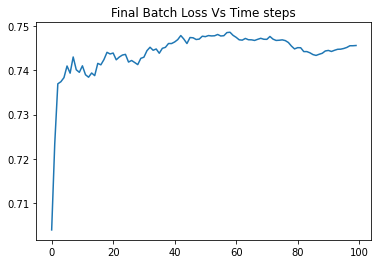

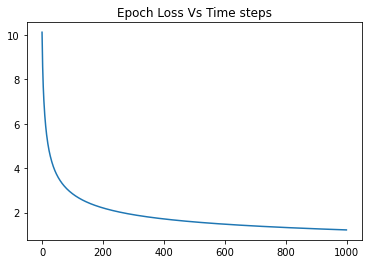

In [ ]:
transfer_model = maml
train_transfer(transfer_model, 500, test_ds)

In [135]:
class_model_name = 'class_model_2022-02-28_09-39-02.h5'   # 분류기에 사용할 학습 모델
multi_standard_list = ['ISO', 'SAE', 'JIS', 'JASO', 'GB', 'EN', 'KS']  # random sampling을 위한 "다중" 국가표준 리스트
single_standard_list = 'ISO' # random sampling을 위한 "단일" 국가표준 리스트

model_class_names = OHE_class_names 

def single_random_sampling(tool, num): # tool: standard_name, num: # of sampling data per material, kk: index of sampling dataset

    f_index= "Name"
    file_name = 'test_file'

    xlsxfile= pd.read_excel(f'{file_name}.xlsx',sheet_name=f'{tool}',engine='openpyxl')
    name_val=xlsxfile[f'{f_index}']
    name_val=name_val.values
    name_list=name_val.tolist()
    name_list = [x for x in name_list if pd.isnull(x) == False]
    total_list = pd.DataFrame()
    time =0

    for m_name in name_list:
        name=m_name

        frame = xlsxfile.loc[xlsxfile[f'{f_index}']==f'{name}']
        frame= pd.DataFrame(frame)
        frame=frame.drop(['Steel Class',f'{f_index}','표준번호','개정년도'],axis=1)
        k= pd.concat([frame],axis=0)
        k.to_csv("one_m.csv",index=False,encoding='utf-8-sig')

        for count in range(0,num):
            time+=1
            data= pd.read_csv("./one_m.csv" ,encoding='utf-8-sig')
            data.fillna(0)
            f1_min, f1_max = data.iloc[0,0], data.iloc[0,1]
            f2_min, f2_max = data.iloc[0,2], data.iloc[0,3] 
            f3_min, f3_max = data.iloc[0,4], data.iloc[0,5] 
            f4_min, f4_max = data.iloc[0,6], data.iloc[0,7]
            f5_min, f5_max = data.iloc[0,8], data.iloc[0,9]
            f6_min, f6_max = data.iloc[0,10], data.iloc[0,11]
            f7_min, f7_max = data.iloc[0,12], data.iloc[0,13]
            f8_min, f8_max = data.iloc[0,14], data.iloc[0,15]
            f9_min, f9_max = data.iloc[0,16], data.iloc[0,17]
            f10_min, f10_max = data.iloc[0,18], data.iloc[0,19]
            f11_min, f11_max = data.iloc[0,20], data.iloc[0,21]    
            f12_min, f12_max = data.iloc[0,22], data.iloc[0,23]
            f13_min, f13_max = data.iloc[0,24], data.iloc[0,25]
            f14_min, f14_max = data.iloc[0,26], data.iloc[0,27]
            f15_min, f15_max = data.iloc[0,28], data.iloc[0,29]
            f16_min, f16_max = data.iloc[0,30], data.iloc[0,31]
            f17_min, f17_max = data.iloc[0,32], data.iloc[0,33]
            f18_min, f18_max = data.iloc[0,34], data.iloc[0,35]    

            if f1_max > 0:
                a=random.randrange(f1_min*1000,f1_max*1000)
                a /= 1000               

            if f2_max > 0:
                b=random.randrange(f2_min*1000,f2_max*1000)
                b /= 1000
            else:
                b=0 
            if f3_max > 0:
                c=random.randrange(f3_min*1000,f3_max*1000)
                c /= 1000
            else:
                c=0 
            if f4_max > 0:
                d=random.randrange(f4_min*1000,f4_max*1000)
                d /= 1000
            else:
                d=0 
            if f5_max > 0:
                e=random.randrange(f5_min*1000,f5_max*1000)
                e /= 1000
            else:
                e=0 
            if f6_max > 0:
                f=random.randrange(f6_min*1000,f6_max*1000)
                f /= 1000
            else:
                f=0 
            if f7_max > 0:
                g=random.randrange(f7_min*1000,f7_max*1000)
                g /= 1000
            else:
                g=0 
            if f8_max > 0:
                h=random.randrange(f8_min*1000,f8_max*1000)
                h /= 1000
            else:
                h=0 
            if f9_max > 0:
                i=random.randrange(f9_min*1000,f9_max*1000)
                i /= 1000
            else:
                i=0 
         ####### 보론은 10000 연산
            if f10_max > 0:
                j=random.randrange(f10_min*10000,f10_max*10000)
                j /= 10000
            else:
                j=0 

            if f11_max > 0:
                k=random.randrange(f11_min*1000,f11_max*1000)
                k /= 1000
            else:
                k=0 
            if f12_max > 0:
                l=random.randrange(f12_min*1000,f12_max*1000)
                l /= 1000
            else:
                l=0 
            if f13_max > 0:
                m=random.randrange(f13_min*1000,f13_max*1000)
                m /= 1000
            else:
                m=0 
            if f14_max > 0:
                n=random.randrange(f14_min*1000,f14_max*1000)
                n /= 1000
            else:
                n=0 
            if f15_max > 0:
                o=random.randrange(f15_min*1000,f15_max*1000)
                o /= 1000
            else:
                o=0 
            if f16_max > 0:
                p=random.randrange(f16_min*1000,f16_max*1000)
                p /= 1000
            else:
                p=0 
            if f17_max > 0:
                q=random.randrange(f17_min*1000,f17_max*1000)
                q /= 1000
            else:
                q=0 
            if f18_max > 0:
                r=random.randrange(f18_min*1000,f18_max*1000)
                r /= 1000
            else:
                r=0 

            k=pd.DataFrame([{"C":a,'Si':b, 'Mn':c ,'P':d,"S":e,"Cr":f,"Mo":g,"Ni":h,"V":i,"B":j,"Sn":k,"Cu":l,"Al":m,"Ti":n,"Nb":o,"W":p,"Pb":q,"N":r,"Name":name}])
            total_list = pd.concat([total_list, k]) 
            #total_list = total_list.append(k)
            #print(f'[{len(name_list)*num}\{time}] {tool}규격의 {name} 강종을 {count+1}개 선정')
    print("# of single_standard_dataset: ", len(total_list))   
    return total_list


class Evaluation():

    def __init__(self, model, standard, num):
        self.fit_res = []
        self.predict_Label_dataset = []

        self.input_Data = single_random_sampling(standard, num)
        self.label = pd.DataFrame(self.input_Data['Name'].values)
        self.input_DF = pd.DataFrame(self.input_Data.iloc[:,:-1].values) 

        self.x_eval = self.input_DF.values # np.ndarray type by values
        self.x = tf.convert_to_tensor(self.x_eval) # tensor type by tf.convert~~
        self.selected_model = copy_model(model, self.x) # model, maml, transfer_model  ** copy_model 안에 tensor변환 코드 포함... tensor to tensor error 유무 파악 필요
        self.logits = self.selected_model.forward(self.x)
        self.fit_res.append(self.logits)
        #print(self.input_Data)
        for i in self.fit_res[0]:
            self.predict_Label_dataset.append(model_class_names[np.argmax(i)])
                
        self.label_dataset = self.input_Data['Name'].values
        self.label_dataset = pd.DataFrame(self.label_dataset)
        
        self.label_dataset.columns = ['Alloy_name']
        self.label_dataset['predicted_Alloy_name'] = pd.DataFrame(self.predict_Label_dataset)
        
        #print(self.label_dataset)
    
    def single_rank_function(self):
        False_number = 0
        for i in self.label_dataset.index:
            if not self.label_dataset.iloc[i,0] == self.label_dataset.iloc[i,1]:
                False_number += 1
            else:
                continue
        True_number = len(self.label_dataset) - False_number
        Accuracy = 100*True_number/len(self.label_dataset)
        print("1 Rank 정확도(%): ", Accuracy)

    def multi_rank_function(self, rank_list=[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]):
        print("1~50 Rank 정확도(%):") 
        accuracy_list = []
        for target_rank in rank_list:
            False_group_number = 0
            for k, l in enumerate(self.fit_res[0]):
                sort_indices_list = np.argsort(l)[::-1]
                sort_indices_list = sort_indices_list[:target_rank]
                temp_class_names = []
                for num in sort_indices_list:
                    temp_class_names.append(model_class_names[num])
                if self.label_dataset.iloc[k,0] not in temp_class_names:
                    False_group_number += 1
                else:
                    continue

            True_number_in_rank_system = len(self.label_dataset) - False_group_number
            Accuracy2 = 100*True_number_in_rank_system/len(self.label_dataset)
            accuracy_list.append(Accuracy2)
            print(str(target_rank) + "_Rank = :", str(Accuracy2))


In [180]:
#Evaluation(maml, "ISO", 1).single_rank_function()
for i in multi_standard_list:
    Evaluation(maml, i, 10).multi_rank_function()


NameError: name 'maml_model' is not defined